# 2. Preprocesado de Datos

## 2.1 Manejo de Datos Ausentes

Se comprueba qué columnas tienen datos nulos

In [1]:
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

print(df_datos.isnull().sum())

Unnamed: 0          0
Store               0
Date                1
Weekly_Sales        1
Holiday_Flag        1
Temperature         1
Fuel_Price          1
CPI                 1
Unemployment        1
Weekly_Rains        0
Weekly_Discounts    0
dtype: int64


Se eliminan las filas que tengan alguna de las siguientes columnas nulas: 'Store', 'Date','Weekly_Sales'

In [2]:
df_datos = df_datos.dropna(subset=['Store', 'Date','Weekly_Sales'])
# Conviene resetear el index del DataFrame ya que las filas eliminadas dejan huecos en dicho index
df_datos = df_datos.reset_index(drop=True)

print(df_datos.isnull().sum())
print(df_datos)


Unnamed: 0          0
Store               0
Date                0
Weekly_Sales        0
Holiday_Flag        1
Temperature         1
Fuel_Price          1
CPI                 1
Unemployment        1
Weekly_Rains        0
Weekly_Discounts    0
dtype: int64
     Unnamed: 0  Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
0             3    1.0  26-02-2010    1409727.59           NaN        46.63   
1             4    1.0  05-03-2010    1554806.68           0.0          NaN   
2             5    1.0  12-03-2010    1439541.59           0.0        57.79   
3             6    1.0  19-03-2010    1472515.79           0.0        54.58   
4             7    1.0  26-03-2010    1404429.92           0.0        51.45   
..          ...    ...         ...           ...           ...          ...   
135         138    1.0  28-09-2012    1437059.26           0.0        76.08   
136         139    1.0  05-10-2012    1670785.97           0.0        68.55   
137         140    1.0  12-10-2012

Se asignan los siguientes valores a las celdas con valores ausentes de cada columna:
- 'Holiday_Flag': 0 
- 'Temperature': la media de Temperature 
- 'Fuel_Price': la mediana de Fuel_Price
- 'CPI': la moda de CPI
- 'Unemployment': el Q1 (cuartil 1) de Unemployment


In [3]:
dic_valores_a_asignar_a_valores_ausentes = {'Holiday_Flag': 0, 
                                            'Temperature': df_datos['Temperature'].mean(), 
                                            'Fuel_Price': df_datos['Fuel_Price'].median(), 
                                            'CPI': df_datos['CPI'].mode(), 
                                            'Unemployment': df_datos['Unemployment'].quantile(0.25),
                                    }
df_datos = df_datos.fillna(value = dic_valores_a_asignar_a_valores_ausentes)
print(df_datos.isnull().sum())
print(df_datos)


Unnamed: 0          0
Store               0
Date                0
Weekly_Sales        0
Holiday_Flag        0
Temperature         0
Fuel_Price          0
CPI                 0
Unemployment        0
Weekly_Rains        0
Weekly_Discounts    0
dtype: int64
     Unnamed: 0  Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
0             3    1.0  26-02-2010    1409727.59           0.0    46.630000   
1             4    1.0  05-03-2010    1554806.68           0.0    69.069209   
2             5    1.0  12-03-2010    1439541.59           0.0    57.790000   
3             6    1.0  19-03-2010    1472515.79           0.0    54.580000   
4             7    1.0  26-03-2010    1404429.92           0.0    51.450000   
..          ...    ...         ...           ...           ...          ...   
135         138    1.0  28-09-2012    1437059.26           0.0    76.080000   
136         139    1.0  05-10-2012    1670785.97           0.0    68.550000   
137         140    1.0  12-10-2012

## 2.2 Conjunto de Entrenamiento y Prueba

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

df_X = pd.DataFrame(df_datos, columns=['Store','Date','Holiday_Flag','Temperature','Fuel_Price',
                                       'CPI','Unemployment','Weekly_Rains','Weekly_Discounts'])
df_y = pd.DataFrame(df_datos, columns=['Weekly_Sales'])
df_X_train,df_X_test,df_y_train,df_y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=100)

print("Cantidad de Filas y Columnas de X: ", df_X.shape)
print("Cantidad de Filas y Columnas de y: ", df_y.shape)
print("Cantidad de Filas y Columnas de X_train: ", df_X_train.shape)
print("Cantidad de Filas y Columnas de y_train: ", df_y_train.shape)
print("Cantidad de Filas y Columnas de X_test: ", df_X_test.shape)
print("Cantidad de Filas y Columnas de y_test: ", df_y_test.shape)
print(df_X)
print(df_y)
print(df_X_train)
print(df_y_train)
print(df_X_test)
print(df_y_test)


Cantidad de Filas y Columnas de X:  (142, 9)
Cantidad de Filas y Columnas de y:  (142, 1)
Cantidad de Filas y Columnas de X_train:  (113, 9)
Cantidad de Filas y Columnas de y_train:  (113, 1)
Cantidad de Filas y Columnas de X_test:  (29, 9)
Cantidad de Filas y Columnas de y_test:  (29, 1)
     Store        Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1.0         NaN           1.0        38.51       2.548  211.242170   
1      1.0  19-02-2010           0.0        39.93       2.514  211.289143   
2      1.0  26-02-2010           NaN        46.63       2.561  211.319643   
3      1.0  05-03-2010           0.0          NaN       2.625  211.350143   
4      1.0  12-03-2010           0.0        57.79         NaN  211.380643   
..     ...         ...           ...          ...         ...         ...   
137    1.0  28-09-2012           0.0        76.08       3.666  222.981658   
138    1.0  05-10-2012           0.0        68.55       3.617  223.181477   
139    1.0  12-10

## 2.3 Gestión de Datos Categóricos

Datos Ordinales

In [6]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

categorias_weekly_rains = ['Ninguna','Pocas','Medias','Muchas']

codificador_ordinal = OrdinalEncoder(categories=[categorias_weekly_rains])
codificacion_ordinal = codificador_ordinal.fit_transform(df_datos[['Weekly_Rains']])

df_nuevas_columnas_ordinal = pd.DataFrame(codificacion_ordinal,columns=['Weekly_Rains_Cod'])
df_datos = df_datos.join(df_nuevas_columnas_ordinal)

print(df_datos)


     Unnamed: 0  Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
0             1    1.0         NaN    1641957.44           1.0        38.51   
1             2    1.0  19-02-2010           NaN           0.0        39.93   
2             3    1.0  26-02-2010    1409727.59           NaN        46.63   
3             4    1.0  05-03-2010    1554806.68           0.0          NaN   
4             5    1.0  12-03-2010    1439541.59           0.0        57.79   
..          ...    ...         ...           ...           ...          ...   
137         138    1.0  28-09-2012    1437059.26           0.0        76.08   
138         139    1.0  05-10-2012    1670785.97           0.0        68.55   
139         140    1.0  12-10-2012    1573072.81           0.0        62.99   
140         141    1.0  19-10-2012    1508068.77           0.0        67.97   
141         142    1.0  26-10-2012    1493659.74           0.0        69.16   

     Fuel_Price         CPI  Unemployment Weekly_Ra

Datos Nominales

In [7]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

codificador_one_hot = OneHotEncoder()
codificacion_one_hot = codificador_one_hot.fit_transform(df_datos[['Weekly_Discounts']])

arr_nombre_nuevas_columnas = 'Weekly_Discounts_' + codificador_one_hot.categories_[0]

df_nuevas_columnas_one_hot = pd.DataFrame(codificacion_one_hot.toarray(),columns=arr_nombre_nuevas_columnas)
df_datos = df_datos.join(df_nuevas_columnas_one_hot)

print(df_datos)

     Unnamed: 0  Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
0             1    1.0         NaN    1641957.44           1.0        38.51   
1             2    1.0  19-02-2010           NaN           0.0        39.93   
2             3    1.0  26-02-2010    1409727.59           NaN        46.63   
3             4    1.0  05-03-2010    1554806.68           0.0          NaN   
4             5    1.0  12-03-2010    1439541.59           0.0        57.79   
..          ...    ...         ...           ...           ...          ...   
137         138    1.0  28-09-2012    1437059.26           0.0        76.08   
138         139    1.0  05-10-2012    1670785.97           0.0        68.55   
139         140    1.0  12-10-2012    1573072.81           0.0        62.99   
140         141    1.0  19-10-2012    1508068.77           0.0        67.97   
141         142    1.0  26-10-2012    1493659.74           0.0        69.16   

     Fuel_Price         CPI  Unemployment Weekly_Ra

## 2.4 Escalamiento: Normalización y Estandarización

La Normalización es necesaria para resolver el siguiente problema:

     Fuel_Price         CPI
0         2.548  211.242170
1         2.514  211.289143
2         2.561  211.319643
3         2.625  211.350143
4           NaN  211.380643
..          ...         ...
137       3.666  222.981658
138       3.617  223.181477
139       3.601  223.381296
140       3.594  223.425723
141       3.506  223.444251

[142 rows x 2 columns]


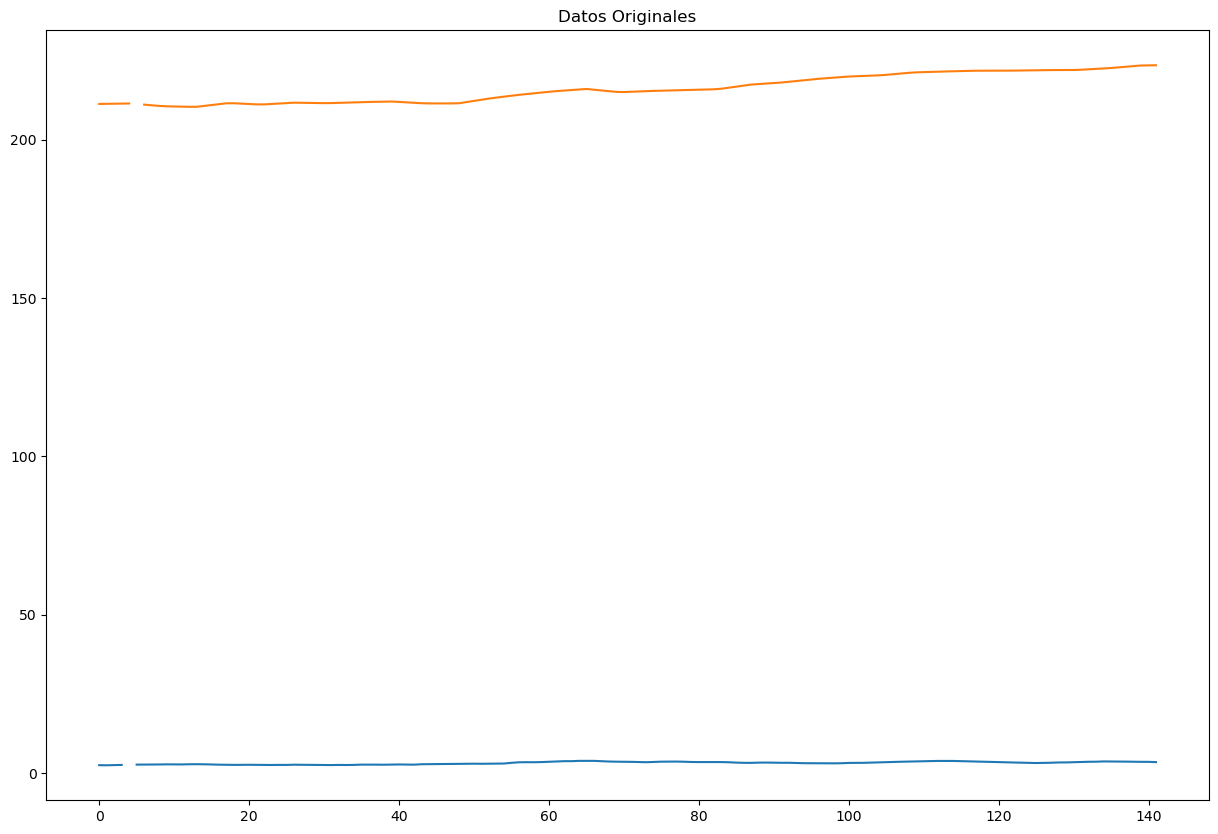

In [8]:
import matplotlib.pyplot as pl
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

print(df_datos[['Fuel_Price','CPI']])

figura = pl.figure(figsize=(15,10))

eje = figura.add_subplot(1,1,1)
eje.set_title('Datos Originales')
eje.plot(df_datos[['Fuel_Price','CPI']])
pl.show()

Normalización

Mínimo de Fuel_Price_Normalizado:  0.0
Máximo Típica de Fuel_Price_Normalizado:  1.0
Mínimo de CPI_Normalizado:  0.0
Máximo Típica de CPI_Normalizado:  1.0


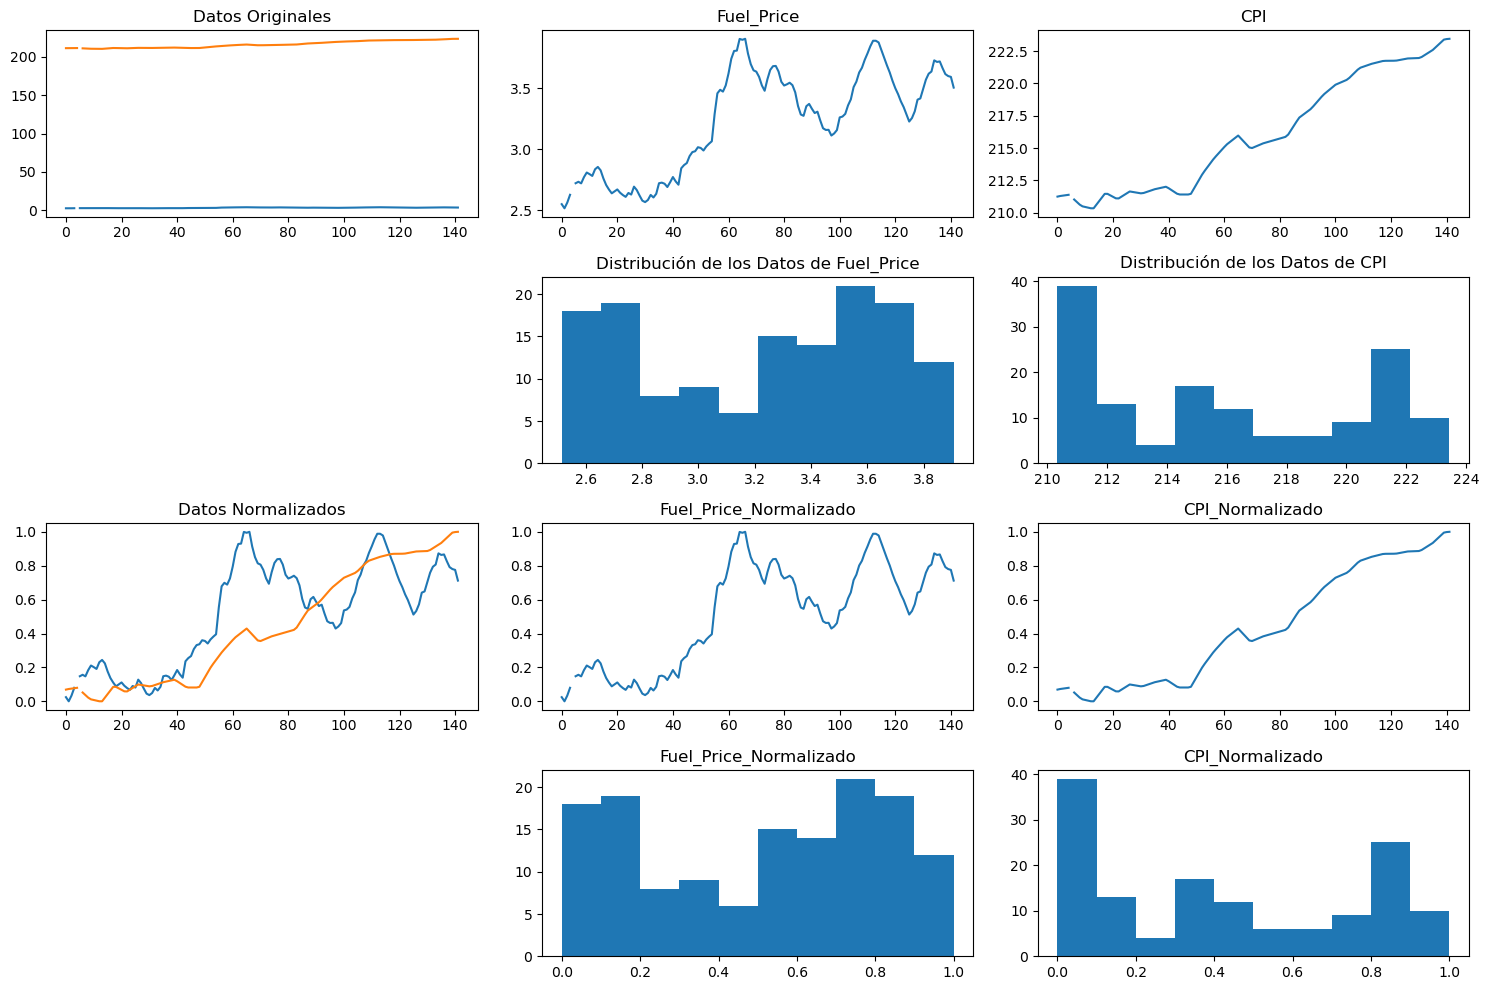

In [9]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as pl
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

arr_normalizado = MinMaxScaler().fit_transform(df_datos[['Fuel_Price','CPI']])
df_normalizado = pd.DataFrame(arr_normalizado, columns=['Fuel_Price_Normalizado','CPI_Normalizado'])

print('Mínimo de Fuel_Price_Normalizado: ', 
      df_normalizado['Fuel_Price_Normalizado'].min())
print('Máximo Típica de Fuel_Price_Normalizado: ', 
      df_normalizado['Fuel_Price_Normalizado'].max())
print('Mínimo de CPI_Normalizado: ', 
      df_normalizado['CPI_Normalizado'].min())
print('Máximo Típica de CPI_Normalizado: ', 
      df_normalizado['CPI_Normalizado'].max())

figura = pl.figure(figsize=(15,10))

eje1 = figura.add_subplot(4,3,1)
eje1.set_title('Datos Originales')
eje1.plot(df_datos[['Fuel_Price','CPI']])

eje2 = figura.add_subplot(4,3,2)
eje2.set_title('Fuel_Price')
eje2.plot(df_datos['Fuel_Price'])

eje3 = figura.add_subplot(4,3,3)
eje3.set_title('CPI')
eje3.plot(df_datos['CPI'])

eje5 = figura.add_subplot(4,3,5)
eje5.set_title('Distribución de los Datos de Fuel_Price')
eje5.hist(df_datos['Fuel_Price'])

eje6 = figura.add_subplot(4,3,6)
eje6.set_title('Distribución de los Datos de CPI')
eje6.hist(df_datos['CPI'])

eje7 = figura.add_subplot(4,3,7)
eje7.set_title('Datos Normalizados')
eje7.plot(df_normalizado[['Fuel_Price_Normalizado','CPI_Normalizado']])

eje8 = figura.add_subplot(4,3,8)
eje8.set_title('Fuel_Price_Normalizado')
eje8.plot(df_normalizado['Fuel_Price_Normalizado'])

eje9 = figura.add_subplot(4,3,9)
eje9.set_title('CPI_Normalizado')
eje9.plot(df_normalizado['CPI_Normalizado'])

eje11 = figura.add_subplot(4,3,11)
eje11.set_title('Fuel_Price_Normalizado')
eje11.hist(df_normalizado['Fuel_Price_Normalizado'])

eje12 = figura.add_subplot(4,3,12)
eje12.set_title('CPI_Normalizado')
eje12.hist(df_normalizado['CPI_Normalizado'])

figura.tight_layout()
pl.show()

Estandarización

Media de Fuel_Price_Estandarizado:  8.566827310582768e-16
Desviación Típica de Fuel_Price_Estandarizado:  1.003565073696199
Media de CPI_Estandarizado:  -5.543241200965321e-16
Desviación Típica de CPI_Estandarizado:  1.0035650736961985


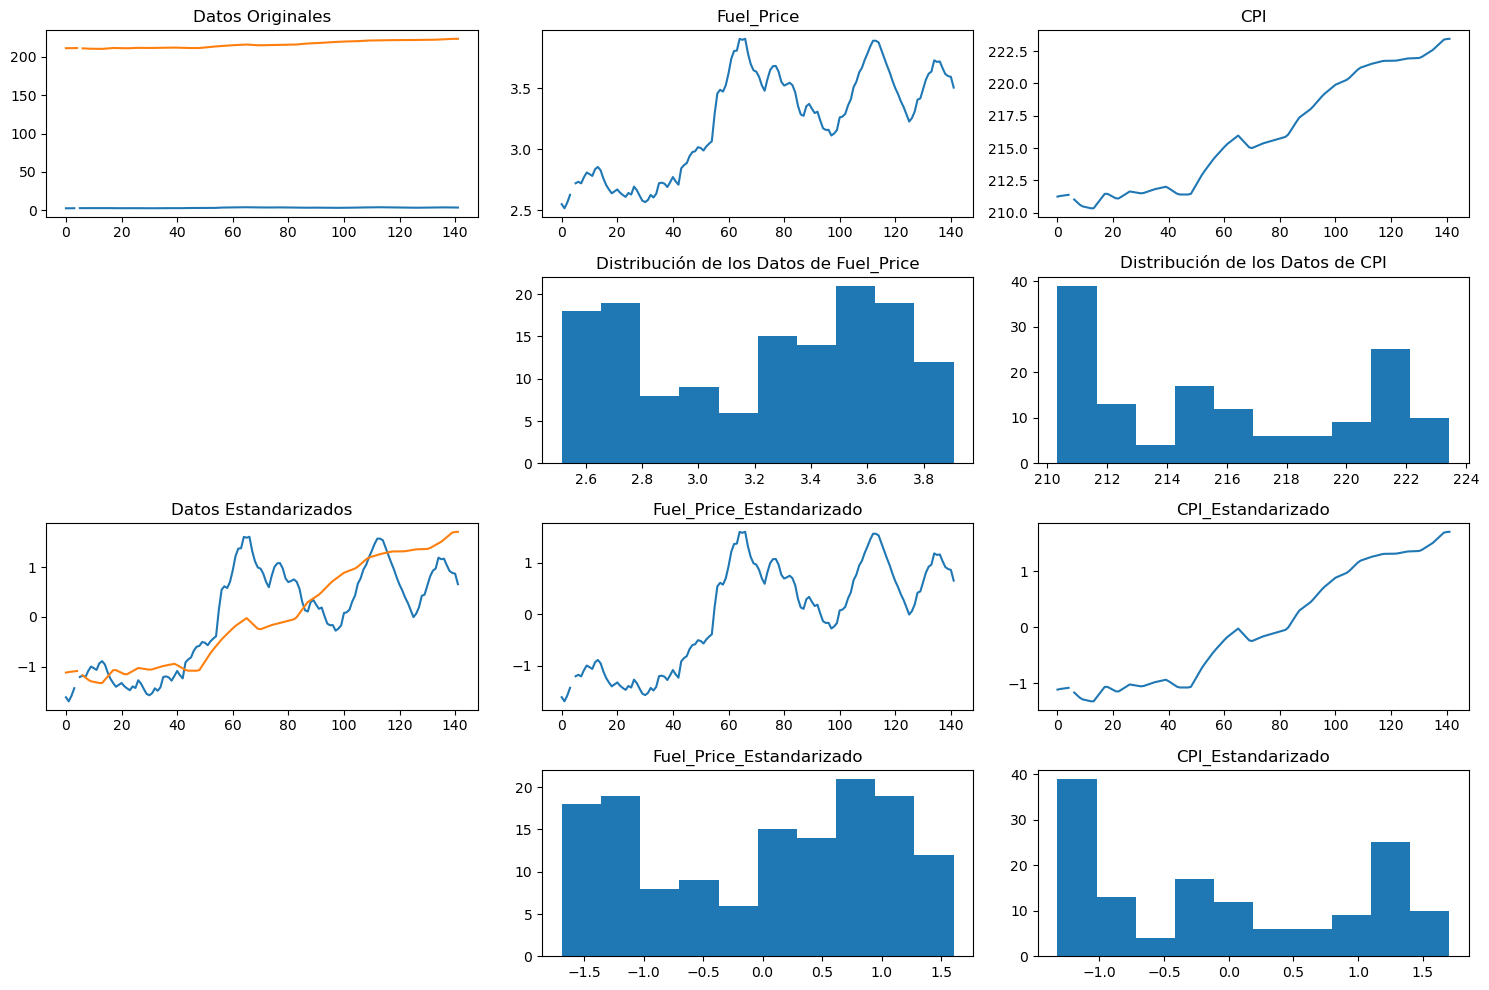

In [10]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as pl
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

arr_estandarizado = StandardScaler().fit_transform(df_datos[['Fuel_Price','CPI']])
df_estandarizado = pd.DataFrame(arr_estandarizado,
                                columns=['Fuel_Price_Estandarizado','CPI_Estandarizado'])

print('Media de Fuel_Price_Estandarizado: ', 
      df_estandarizado['Fuel_Price_Estandarizado'].mean())
print('Desviación Típica de Fuel_Price_Estandarizado: ', 
      df_estandarizado['Fuel_Price_Estandarizado'].std())
print('Media de CPI_Estandarizado: ', 
      df_estandarizado['CPI_Estandarizado'].mean())
print('Desviación Típica de CPI_Estandarizado: ', 
      df_estandarizado['CPI_Estandarizado'].std())

figura = pl.figure(figsize=(15,10))

eje1 = figura.add_subplot(4,3,1)
eje1.set_title('Datos Originales')
eje1.plot(df_datos[['Fuel_Price','CPI']])

eje2 = figura.add_subplot(4,3,2)
eje2.set_title('Fuel_Price')
eje2.plot(df_datos['Fuel_Price'])

eje3 = figura.add_subplot(4,3,3)
eje3.set_title('CPI')
eje3.plot(df_datos['CPI'])

eje5 = figura.add_subplot(4,3,5)
eje5.set_title('Distribución de los Datos de Fuel_Price')
eje5.hist(df_datos['Fuel_Price'])

eje6 = figura.add_subplot(4,3,6)
eje6.set_title('Distribución de los Datos de CPI')
eje6.hist(df_datos['CPI'])

eje7 = figura.add_subplot(4,3,7)
eje7.set_title('Datos Estandarizados')
eje7.plot(df_estandarizado[['Fuel_Price_Estandarizado','CPI_Estandarizado']])

eje8 = figura.add_subplot(4,3,8)
eje8.set_title('Fuel_Price_Estandarizado')
eje8.plot(df_estandarizado['Fuel_Price_Estandarizado'])

eje9 = figura.add_subplot(4,3,9)
eje9.set_title('CPI_Estandarizado')
eje9.plot(df_estandarizado['CPI_Estandarizado'])

eje11 = figura.add_subplot(4,3,11)
eje11.set_title('Fuel_Price_Estandarizado')
eje11.hist(df_estandarizado['Fuel_Price_Estandarizado'])

eje12 = figura.add_subplot(4,3,12)
eje12.set_title('CPI_Estandarizado')
eje12.hist(df_estandarizado['CPI_Estandarizado'])

figura.tight_layout()
pl.show()



